Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

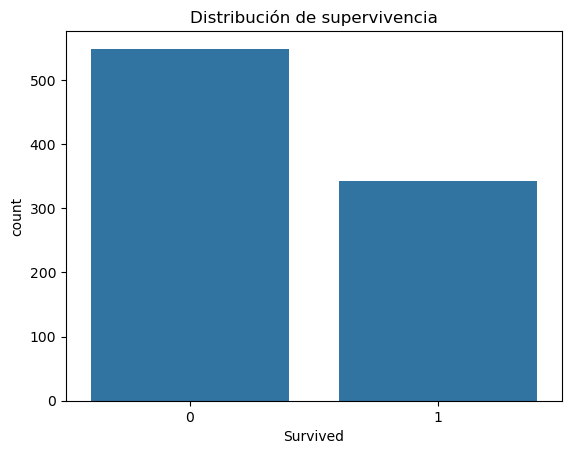

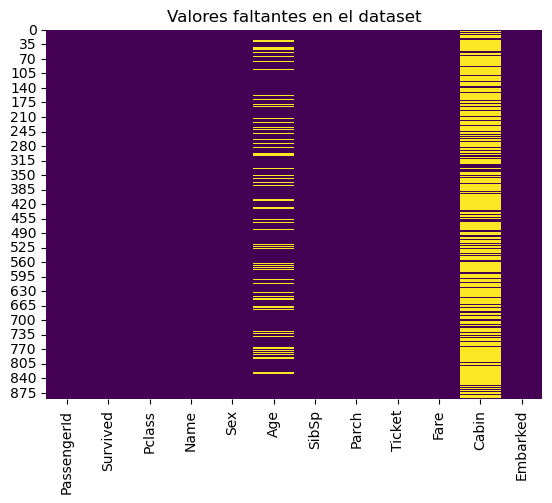


Métricas de evaluación:
Precisión: 0.8100558659217877

Matriz de Confusión:
[[90 15]
 [19 55]]


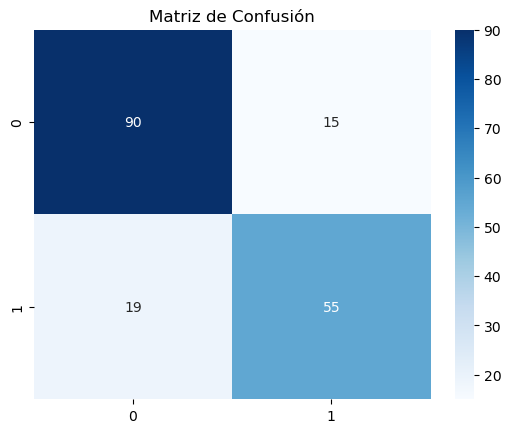


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



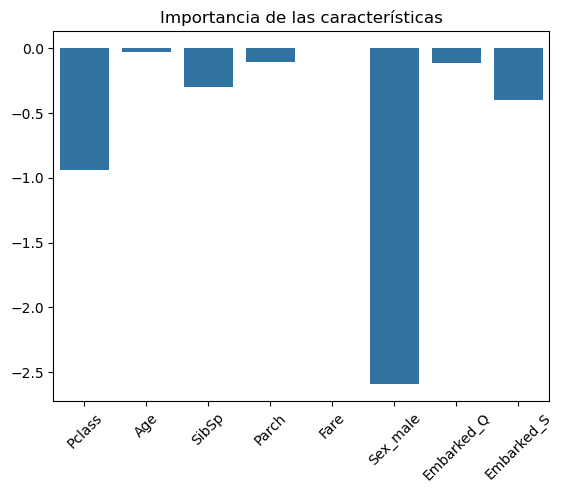

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset
file_path = r'C:\Users\Mariano\Desktop\Analisis de datos\Tarea 5\Guía de actividades y rúbrica de evaluación - Tarea 5 - Proyecto Análisis de datos-20241129\Anexo 6 - Dataset Titanic\Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Análisis exploratorio de datos
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
print(df.info())
print("\nDescripción estadística:")
print(df.describe())

# Gráficas iniciales para entender los datos
sns.countplot(x='Survived', data=df)
plt.title('Distribución de supervivencia')
plt.show()

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores faltantes en el dataset')
plt.show()

# Preprocesamiento de datos
# Reemplazar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Convertir variables categóricas en variables dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Selección de características relevantes
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[selected_features]
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
print("\nMétricas de evaluación:")
print(f"Precisión: {accuracy_score(y_test, y_pred)}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de resultados
sns.barplot(x=selected_features, y=model.coef_[0])
plt.title('Importancia de las características')
plt.xticks(rotation=45)
plt.show()
